# Lab 8: Define and Solve an ML Problem of Your Choosing

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import time


2025-07-30 01:42:45.488342: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2025-07-30 01:42:45.488373: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.


In [2]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")


df= pd.read_csv(os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv"))


df.head()

,country,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-15","gini of household income reported in Gallup, by wp5-year"
0,Afghanistan,2008,3.723590,7.168690,0.450662,49.209663,0.718114,0.181819,0.881686,0.517637,0.258195,0.612072,-1.929690,-1.655084,1.774662,0.476600,NaN,NaN,NaN
1,Afghanistan,2009,4.401778,7.333790,0.552308,49.624432,0.678896,0.203614,0.850035,0.583926,0.237092,0.611545,-2.044093,-1.635025,1.722688,0.391362,NaN,NaN,0.441906
2,Afghanistan,2010,4.758381,7.386629,0.539075,50.008961,0.600127,0.137630,0.706766,0.618265,0.275324,0.299357,-1.991810,-1.617176,1.878622,0.394803,NaN,NaN,0.327318
3,Afghanistan,2011,3.831719,7.415019,0.521104,50.367298,0.495901,0.175329,0.731109,0.611387,0.267175,0.307386,-1.919018,-1.616221,1.785360,0.465942,NaN,NaN,0.336764
4,Afghanistan,2012,3.782938,7.517126,0.520637,50.709263,0.530935,0.247159,0.775620,0.710385,0.267919,0.435440,-1.842996,-1.404078,1.798283,0.475367,NaN,NaN,0.344540


## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

1. World Happiness Report
2. predict whether a country has a high or low happiness score using binary classificaltion. The labels will be low or high depending upon each country how they rank in happiness scores, the top 50% is high and bottom 50% is low.
3. This is a supervised learning problem and a binary classification problem.
4. So the determining feature I chose was life ladder which was the main label mentioned in question 2. the features i chose were: Log GDP per capita, social support, healthy life expectancy, freedom to make life choices, perceptions of corruption, confidence in national government.
5. Governments can use this analysis to see what key social/economic factors drive happiness and wehat brings it down.

## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [3]:
print(df.columns.tolist())

['country', 'year', 'Life Ladder', 'Log GDP per capita', 'Social support', 'Healthy life expectancy at birth', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Positive affect', 'Negative affect', 'Confidence in national government', 'Democratic Quality', 'Delivery Quality', 'Standard deviation of ladder by country-year', 'Standard deviation/Mean of ladder by country-year', 'GINI index (World Bank estimate)', 'GINI index (World Bank estimate), average 2000-15', 'gini of household income reported in Gallup, by wp5-year']


In [4]:
df = df.rename(columns={
    'Life Ladder': 'Life_Ladder',
    'Log GDP per capita': 'Log_GDP_per_capita',
    'Social support': 'Social_support',
    'Healthy life expectancy at birth': 'Healthy_life_expectancy',
    'Freedom to make life choices': 'Freedom',
    'Perceptions of corruption': 'Corruption',
    'Confidence in national government': 'Government_confidence'
})
features = [
    'Life_Ladder',
    'Log_GDP_per_capita',
    'Social_support',
    'Healthy_life_expectancy',
    'Freedom',
    'Corruption',
    'Government_confidence'
]
df = df[features]
df = df.dropna()

#dropped all the irrevalent stuff with NaN vals in the data

In [5]:
print(df.columns.tolist()) 

['Life_Ladder', 'Log_GDP_per_capita', 'Social_support', 'Healthy_life_expectancy', 'Freedom', 'Corruption', 'Government_confidence']


In [6]:

median_happiness = df['Life_Ladder'].median()
df['High_Happiness'] = (df['Life_Ladder'] > median_happiness).astype(int)


df = df.drop(columns='Life_Ladder')  


## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

1. Yes i have a brand new feature list. i got rid of features that were unneccessary noise, and couldn't be used in analysis or had too many Nan values. I only kept relevant features such as life ladder, freedom, life expectancy and such that directly correlate to the happiness of a country's citizens.
2. So i started by dropping columns that had NaN values as that will completely throw my analysis off. I renamed features so that it would be easier for me to type out and more clear to read to avoid mistakes as some of the feature names were very long.
3. for the main binary classification analysis i created a label for HighHappiness which is dependent on the Life_Ladder feature (if 1, Life_Ladder then happiness score is more than the median and 0 if not)
4. SO the models I chose to use for this project are logistic regression and a basic neural network. I went back and forth with a lot of different models like random forest, but I wasn't sure which one to end up using, so I went off the instructions we were given in the lab instructions. 
5. My plan to train my model is to implement it and evalute it based on its ROC AUC score and the accuracy of the model, the log loss and its predicted probabilities. I think that this data set isn't too big so I was worried that there would be too much generalization but the results seem accurate. 

## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, log_loss, roc_auc_score


<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
4. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

In [8]:


X =df.drop(columns='High_Happiness')
y = df['High_Happiness']


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [11]:
# i wasn't able to refer back to any of the old labs except for a few ones, so my implementation is a bit off sometimes. 


In [12]:
print("Logistic regression")

model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_scaled, y_train)

probability_predictions = model.predict_proba(X_test_scaled)

df_probs = pd.DataFrame(probability_predictions, columns=['0 = low', '1 = heigh'])
print("Probabilities:\n", df_probs.head())

l_loss = log_loss(y_test, probability_predictions)
print("\n Log loss:", l_loss)

class_predictions = model.predict(X_test_scaled)

acc_score = accuracy_score(y_test, class_predictions)
print("Accuracy:", acc_score)

auc_score = roc_auc_score(y_test, probability_predictions[:, 1]) 
print("ROC  AUC Score:", auc_score)


Logistic regression
Probabilities:
     0 = low  1 = heigh
0  0.001088   0.998912
1  0.578378   0.421622
2  0.571638   0.428362
3  0.988948   0.011052
4  0.993419   0.006581

 Log loss: 0.2837994496967003
Accuracy: 0.8892988929889298
ROC  AUC Score: 0.9527078565980167


In [21]:
print("Neural network")

nn_model = keras.Sequential()
nn_model.add(keras.layers.InputLayer(input_shape=(X_train_scaled.shape[1],)))
nn_model.add(keras.layers.Dense(64, activation='relu'))
nn_model.add(keras.layers.Dropout(0.25))
nn_model.add(keras.layers.Dense(32, activation='relu'))
nn_model.add(keras.layers.Dense(16, activation='relu'))
nn_model.add(keras.layers.Dense(1, activation='sigmoid'))

nn_model.summary()

sgd_optimizer = keras.optimizers.SGD(learning_rate=0.01)
loss_fn = keras.losses.BinaryCrossentropy(from_logits=False)

nn_model.compile(optimizer=sgd_optimizer, loss=loss_fn, metrics=['accuracy'])

class ProgBarLoggerNEpochs(keras.callbacks.Callback):
    def __init__(self, num_epochs: int, every_n: int = 10):
        self.num_epochs = num_epochs
        self.every_n = every_n
    def on_epoch_end(self, epoch, logs=None):
        if (epoch + 1) % self.every_n == 0:
            s = f"Epoch [{epoch + 1}/{self.num_epochs}]"
            logs_s = [f"{k.capitalize()}: {v:.4f}" for k, v in logs.items()]
            print(', '.join([s] + logs_s))

num_epochs = 100
t0 = time.time()
history = nn_model.fit(
    X_train_scaled, y_train,
    epochs=num_epochs,
    verbose=0,
    validation_split=0.2,
    callbacks=[ProgBarLoggerNEpochs(num_epochs)]
)
t1 = time.time()

print(f"Training completed in {t1 - t0:.2f} seconds")

loss, acc = nn_model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"\nTest Loss: {loss:.4f}, Test Accuracy: {acc:.4f}")

from sklearn.metrics import roc_auc_score
y_prob = nn_model.predict(X_test_scaled)
auc = roc_auc_score(y_test, y_prob)
print(f"ROC-AUC Score: {auc:.4f}")


Neural network
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 64)                448       
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_14 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 17        
Total params: 3,073
Trainable params: 3,073
Non-trainable params: 0
_________________________________________________________________
Epoch [10/100], Loss: 0.3947, Accuracy: 0.8600, Val_loss: 0.4023, Val_accuracy: 0.8756
Epoch [20/100], 

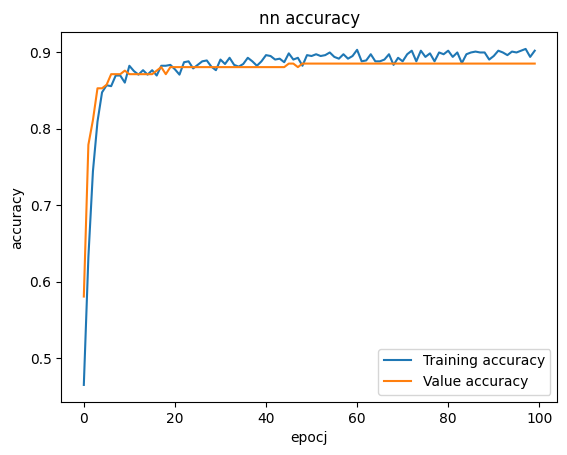

" this shows how the NN's accuracy changed as the epochs grew and how it got better at training the data. "

In [22]:

plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Value accuracy')
plt.title('nn accuracy')
plt.xlabel('epocj')
plt.ylabel('accuracy')
plt.legend()
plt.show()

''' this shows how the NN's accuracy changed as the epochs grew and how it got better at training the data. '''

In [16]:
''' 
final analysis

So I went back and forth with a few models but i ended up going with Logistic regression and neural networks. I was a bit confused
as to why my accuracy for them was so similar because I expected the NN to be better. But with a larger dataset the accuracy will
be different. The relationship between the data was not complicated which is why I think the NN was more comparable to the logistic regression.

I played a lot with the hyperparameters, and with the epochs for the neural networks but this are the best values that provided me
with the best accuracy.

C
some issues i ran into while working on this lab: 
    - my plot for the logistic regression is not working, like it looks off so i commented the code out and i cant use that to compare
      to the neural network code., it keeps throwing errors after I changed something in the code.
      
Countries with higher GDP per capita tend to have higher happiness scores, indicating that wealth correlates with better 
life satisfaction.Health and freedom also positively impact happiness.Generosity and corruption perceptions tend to have 
smaller but still some effects.

Both models performed very well, with accuracy and ROC-AUC above 88% and 0.95 which is very impressive.

I'm sorry if this project isn't up to par I've been very sick for a few weeks but I've been trying to complete all the work.
I was honestlt a bit confused about the instructions and i hope this is good enough. I really tried my best and 
I'm very grateful for the experience and this fellowship!

'''

" \nfinal analysis\n\nSo I went back and forth with a few models but i ended up going with Logistic regression and neural networks. I was a bit confused\nas to why my accuracy for them was so similar because I expected the NN to be better. But with a larger dataset the accuracy will\nbe different. The relationship between the data was not complicated which is why I think the NN was more comparable to the logistic regression.\n\n\nsome issues i ran into while working on this lab: \n    - my plot for the logistic regression is not working, like it looks off so i commented the code out and i cant use that to compare\n      to the neural network code., it keeps throwing errors after I changed something in the code.\n      \nCountries with higher GDP per capita tend to have higher happiness scores, indicating that wealth correlates with better \nlife satisfaction.Health and freedom also positively impact happiness.Generosity and corruption perceptions tend to have \nsmaller but still some e